In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **E-Commerce Customer Churn Prediction**
## 1. Introduction
Trong các doanh nghiệp hiện nay, việc giữ chân khách hàng rất quan trọng trong việc duy trì và ổn định doanh thu. Đây là lí do vì sao project này được thực hiện.
## 2. Project Goal
- Xây dựng mô hình dự đoán về khách hàng có ý định mua hàng trong tương lai hay không.
- Khai phá insight có thể giúp doanh nghiệp duy trì ổn định khách hàng.

## 3. Dataset source
- From kaggle, link: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data

## 4. Process



*** Preference: https://neptune.ai/blog/how-to-implement-customer-churn-prediction

### 4.1 Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

### 4.2 Import dataset

In [3]:
data = pd.read_excel("/content/drive/MyDrive/DA/E Commerce Dataset.xlsx", sheet_name = 'E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### 4.3 Describe dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
print('number of rows: ', data.shape[0])
print('number of columns: ', data.shape[1])

number of rows:  5630
number of columns:  20


In [7]:
# Check duplicate
data['CustomerID'].duplicated().sum()

0

In [8]:
## Drop unescessary columns
data = data.drop(['CustomerID', 'NumberOfDeviceRegistered', 'NumberOfAddress'], axis = 1)

### 4.4 Pre-processing data

In [9]:
data.isnull().sum()

,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
PreferedOrderCat,0
SatisfactionScore,0


In [10]:
# Tenure là thời gian mà khách hàng gắn bó với doanh nghiệp => điền khuyết bằng giá trị trung bình
data['Tenure'] = data['Tenure'].fillna(round(data['Tenure'].median()))

# WarehouseToHome là khoảng cách vận chuyển giữa kho và khách hàng => Điền bằng giá trị trung bình
data['WarehouseToHome'] = data['WarehouseToHome'].fillna(round(data['Tenure'].median()))

# HourSpendOnApp Number of hours spend on mobile application or website
data['HourSpendOnApp'] = data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].median())

# OrderAmountHikeFromlastYear = Percentage increases in order from last year
data['OrderAmountHikeFromlastYear'] = data['OrderAmountHikeFromlastYear'].fillna(data['OrderAmountHikeFromlastYear'].median())

# CouponUsed = Total number of coupon has been used in last month => fill mode value
coupon_nan = data['CouponUsed'].mode()[0]
data['CouponUsed'] = data['CouponUsed'].fillna(coupon_nan)

# OrderCount = Total number of orders has been places in last month
oder_nan = data['OrderCount'].mode()[0]
data['OrderCount'] = data['OrderCount'].fillna(oder_nan)

# DaySinceLastOrder = Day Since last order by customer
date_nan = data['DaySinceLastOrder'].mode()[0]
data['DaySinceLastOrder'] = data['DaySinceLastOrder'].fillna(date_nan)

In [11]:
float_columns = data.select_dtypes(include=['float']).columns
object_columns = data.select_dtypes(include=['object']).columns
print("Float columns:")
print(float_columns)
print("\nObject columns:")
print(object_columns)

Float columns:
Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Object columns:
Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


In [12]:
for col in object_columns:
  print(data[col].value_counts())
  print()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

Gender
Male      3384
Female    2246
Name: count, dtype: int64

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64



In [13]:
# Chuyển các biến có ý nghĩa giống nhau thành 1
data['PreferredLoginDevice'].replace('Mobile Phone', 'Phone', inplace = True)
data['PreferredPaymentMode'].replace('COD', 'Cash on Delivery', inplace = True)
data['PreferedOrderCat'].replace('Mobile Phone', 'Mobile', inplace = True)

In [14]:
data.select_dtypes(include=['number']).columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

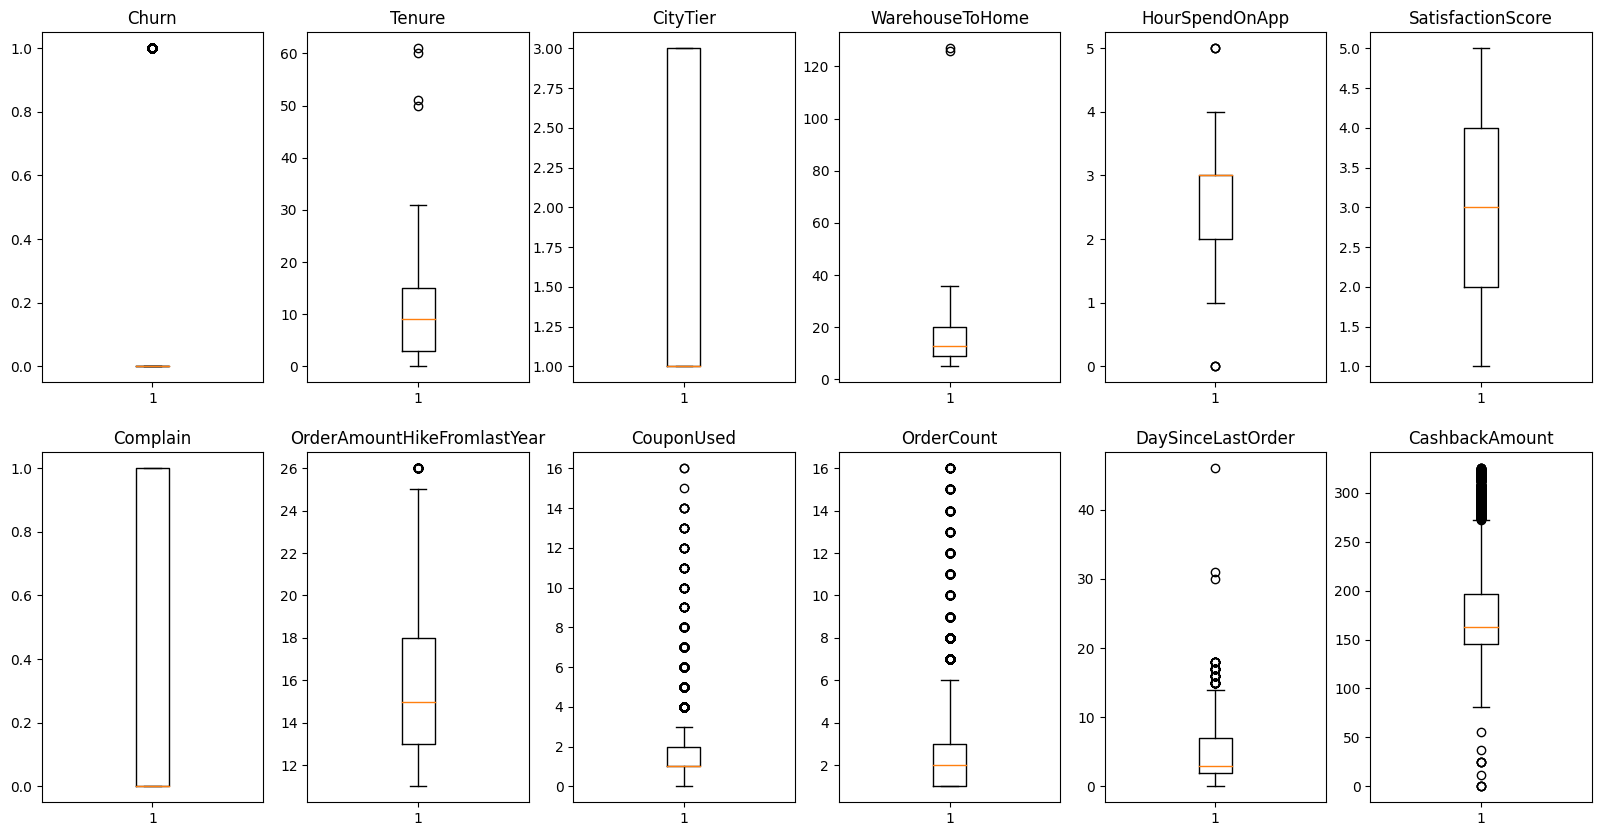

In [15]:
import plotly.express as px
fig, axes = plt.subplots(2, 6, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(data.select_dtypes(include=['number']).columns):
  axes[i].boxplot(data[col])
  axes[i].set_title(col)

In [16]:
data.to_csv("/content/drive/MyDrive/DA/cleaned_data.csv", index = False)

### 4.5 Exploratory Data Analysis (EDA)

#### 4.5.1 Taget variable (Churn)

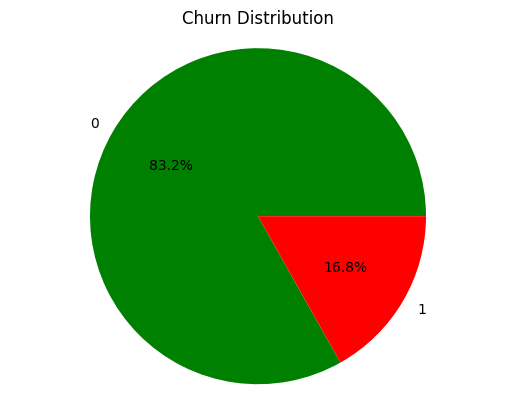

In [17]:
def plot_pie_chart(df, column_name, title, colors):
    column_counts = df[column_name].value_counts()
    plt.pie(column_counts.values, labels=column_counts.index, colors = colors, autopct='%1.1f%%')
    plt.title(title)
    plt.axis('equal')
    plt.show()

plot_pie_chart(data, 'Churn', 'Churn Distribution', ['green', 'red'])

Đây là bộ dữ liệu không cân bằng, số lượng khách hàng rời bỏ doanh nghiệp chiếm 16.8%.

#### 4.5.2 Feature Variable

In [18]:
ft_df = data
ft_df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,Laptop & Accessory,2,Single,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,Mobile,3,Single,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,Mobile,3,Single,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,Laptop & Accessory,5,Single,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,Mobile,5,Single,0,11.0,1.0,1.0,3.0,129.60


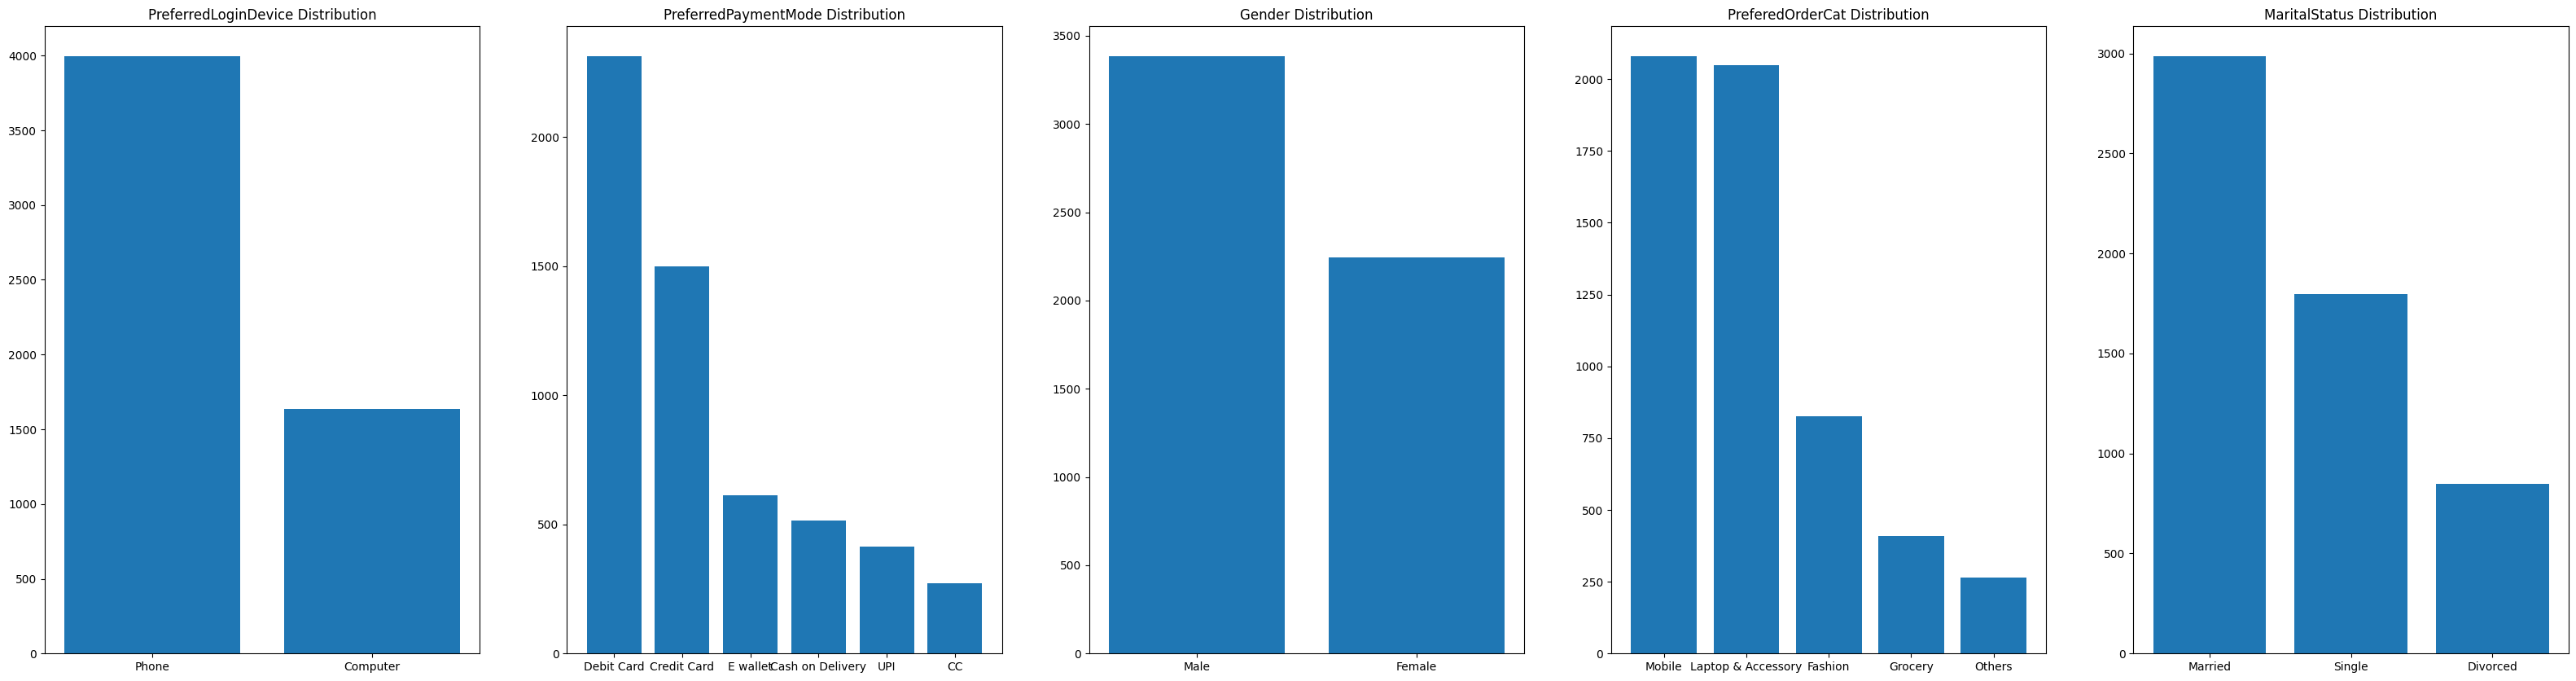

In [19]:
categorical_columns = ft_df.select_dtypes(include=['object']).columns

def plot_category_variable(df, column_name):
  bar_labels = ['red', 'blue', 'red', 'orange']
  bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

  fig, ax = plt.subplots(1, len(column_name), figsize=(40, 10))
  for i, col in enumerate(column_name):
    column_counts = df[col].value_counts()
    ax[i].bar(column_counts.index, column_counts.values)
    ax[i].set_title(col + " Distribution")

plot_category_variable(ft_df, categorical_columns)

In [20]:
categorical_columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

<Axes: xlabel='Tenure_bins', ylabel='count'>

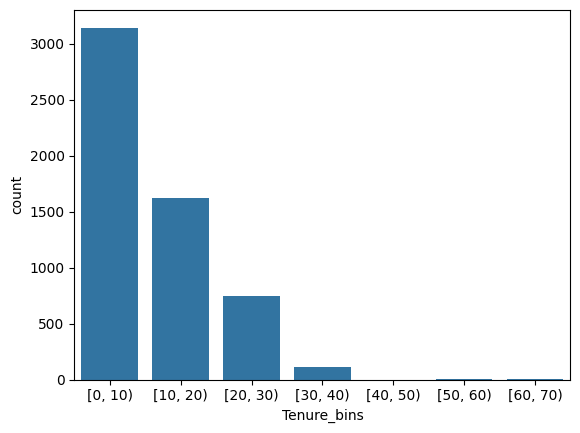

In [21]:
bins = [0,10,20,30,40,50,60,70]
ft_df['Tenure_bins'] = pd.cut(ft_df['Tenure'], bins=bins, right=False)
sns.countplot(x='Tenure_bins', data=ft_df)

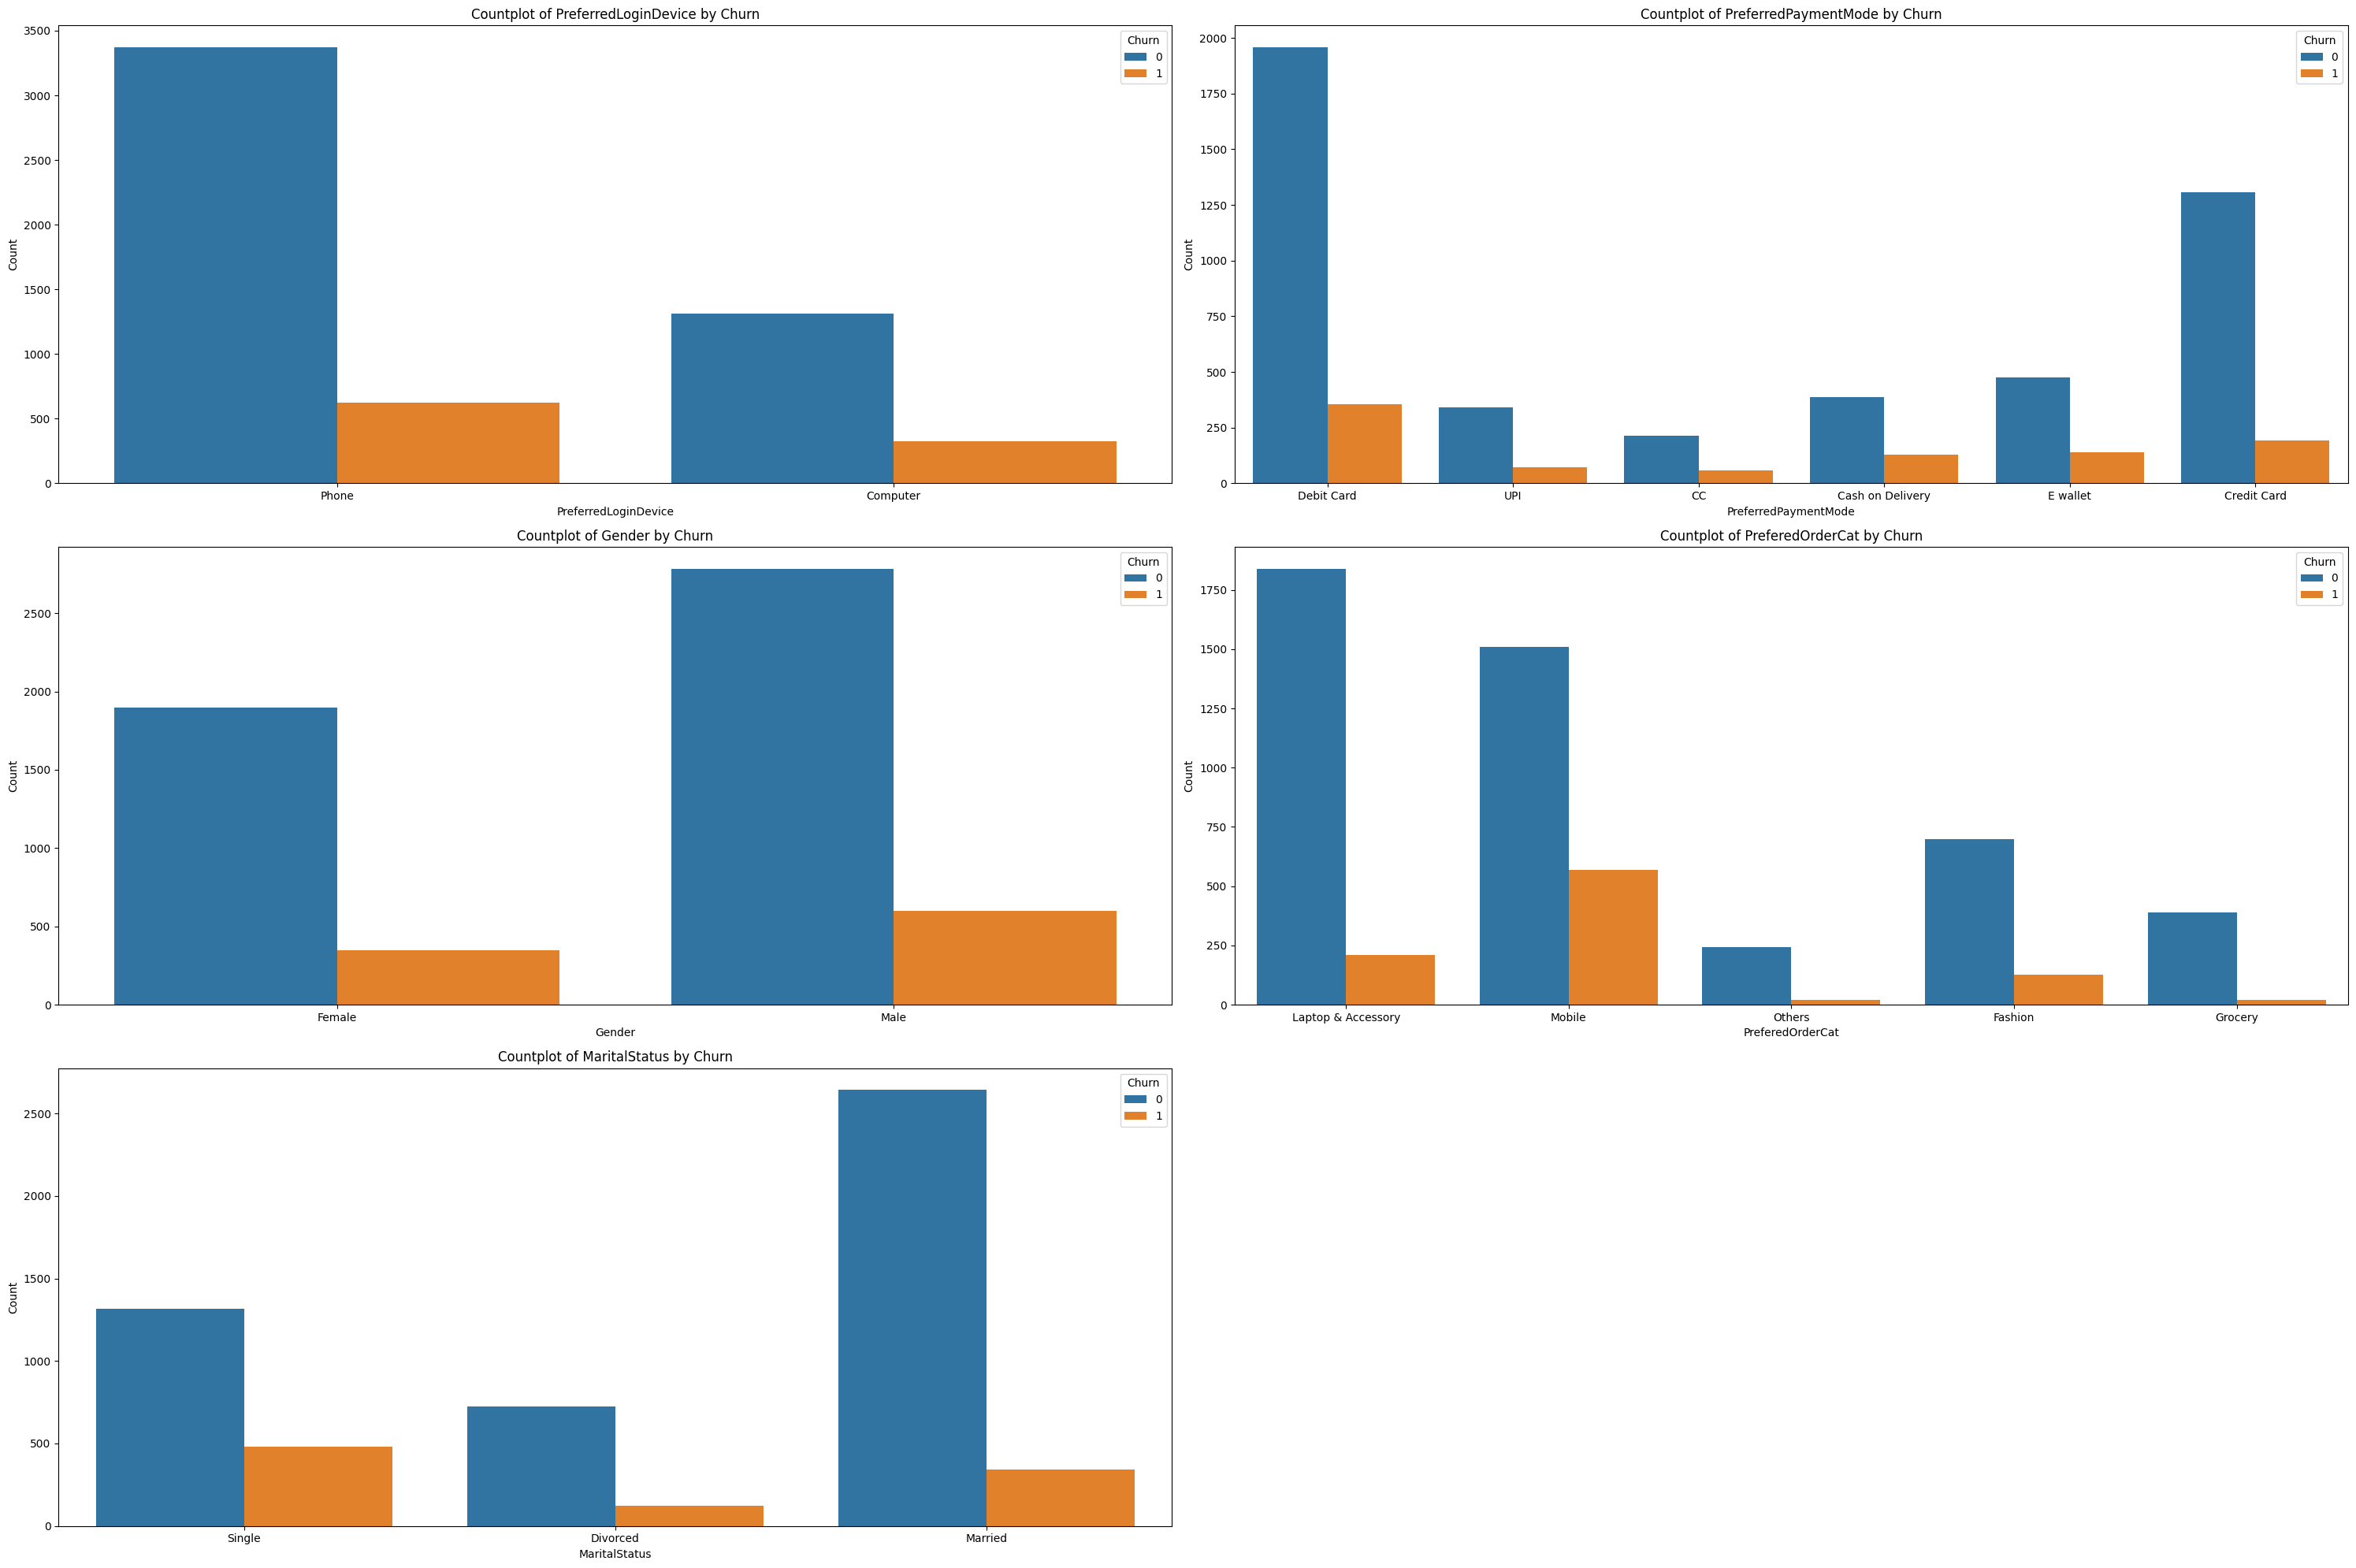

In [22]:
num_rows = len(categorical_columns) // 2 + (len(categorical_columns) % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(30, 20))
axes = axes.flatten()

# Loop through categorical columns and create countplots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue="Churn", data=ft_df, ax=axes[i])
    axes[i].set_title(f'Countplot of {column} by Churn')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any extra subplot if the number of categorical columns is odd
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[len(categorical_columns)])

# Adjust layout
plt.tight_layout()
plt.show()

In [23]:
number_columns = ft_df.select_dtypes(include=['number']).columns
number_columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

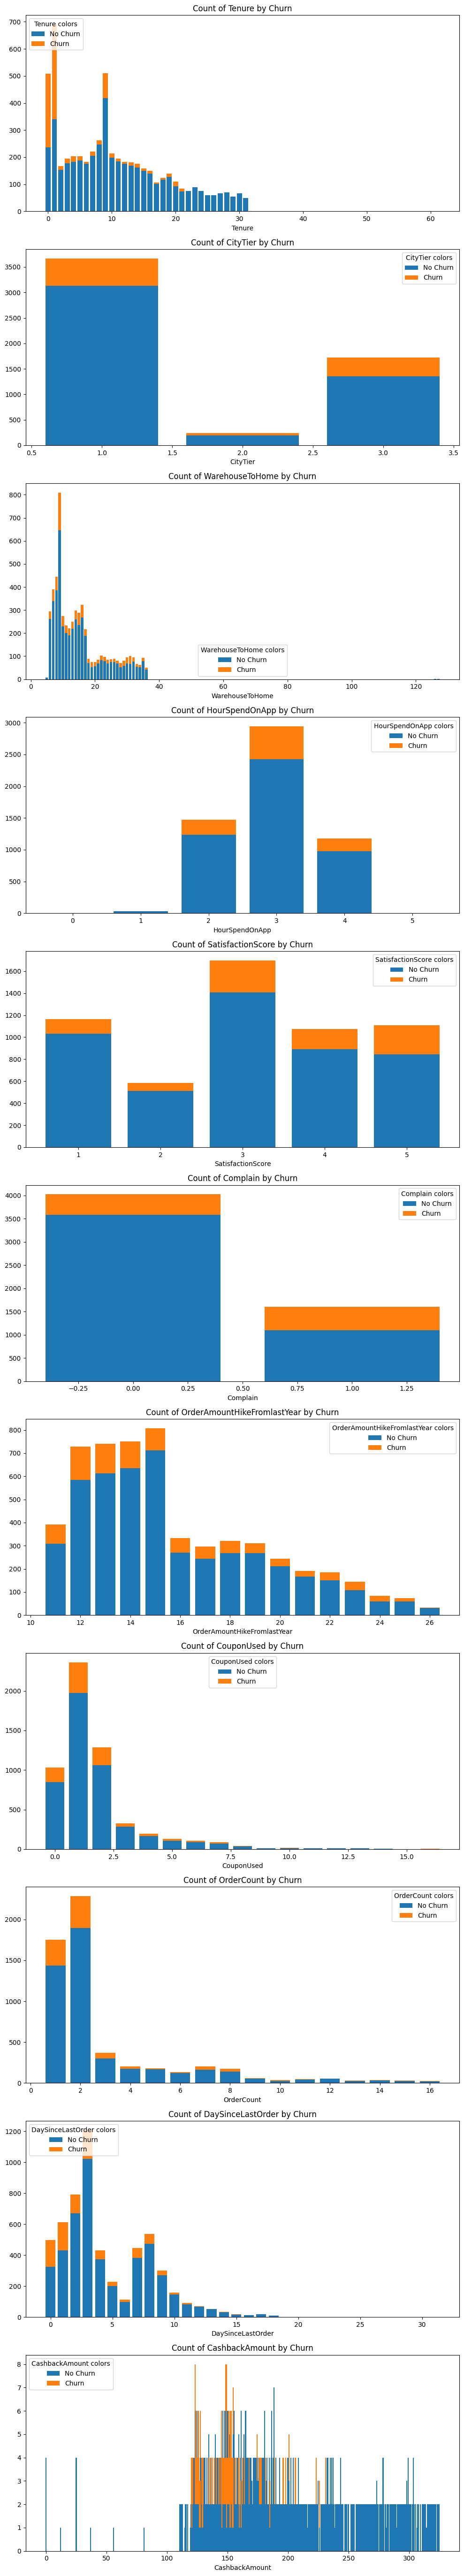

In [24]:
def plot_numerical_variable(df, column_name):
    fig, axes = plt.subplots(len(column_name), 1, figsize=(10, 5*len(column_name)))
    if len(column_name) == 1:
        axes = [axes]
    for i, col in enumerate(column_name):
        count_ = df.groupby([col, 'Churn']).size().unstack()
        bar_colors = ['#1f77b4', '#ff7f0e']
        bar_labels = ['No Churn', 'Churn']

        axes[i].bar(count_.index, count_[0], color=bar_colors[0], label=bar_labels[0])
        axes[i].bar(count_.index, count_[1], bottom=count_[0], color=bar_colors[1], label=bar_labels[1])
        axes[i].set_title(f'Count of {col} by Churn')
        axes[i].set_xlabel(col)
        axes[i].legend(title=f'{col} colors')
    plt.tight_layout()
    plt.show()

plot_numerical_variable(ft_df, number_columns.drop('Churn'))


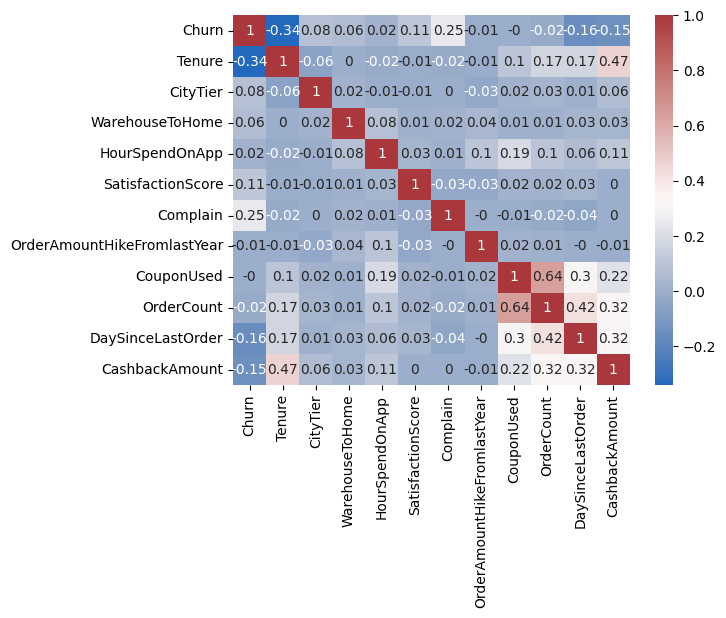

In [25]:
matrix = ft_df[number_columns].corr().round(2)
sns.heatmap(matrix, annot=True, cmap='vlag')
plt.show()

#### 4.5.3 Statistical Analysis

In [62]:
df = pd.read_csv("/content/drive/MyDrive/DA/cleaned_data.csv")
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,Laptop & Accessory,2,Single,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,Mobile,3,Single,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,Mobile,3,Single,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,Laptop & Accessory,5,Single,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,Mobile,5,Single,0,11.0,1.0,1.0,3.0,129.60


##### Kiểm định t-test

In [70]:
df['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Phone,3996
Computer,1634


In [71]:
## Phone và Computer liệu có khác biệt nhau về số tiền hoàn trả lại
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, chi2_contingency

order_cat = df.groupby('PreferredLoginDevice')
phone_refund = order_cat.get_group('Phone')['CashbackAmount'].sample(100)
computer_refund = order_cat.get_group('Computer')['CashbackAmount'].sample(100)

t_statistics, t_p_value = ttest_ind(phone_refund, computer_refund)

print('Statistics:', t_statistics)
print('P-value:', t_p_value)
if t_p_value < 0.05:
  print('Có sự khác biệt đáng kể về số tiền hoàn trả trung bình giữa 2 thể loại phone và computer')
else:
  print('Không có sự khác biệt đáng kể về số tiền hoàn trả trung bình giữa 2 thể loại phone và computer')

Statistics: 0.6953040426019786
P-value: 0.4876799877769059
Không có sự khác biệt đáng kể về số tiền hoàn trả trung bình giữa 2 thể loại phone và computer


##### Kiếm định ANOVA

In [72]:
df['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Mobile,2080
Laptop & Accessory,2050
Fashion,826
Grocery,410
Others,264


In [74]:
order_cat = df.groupby('PreferedOrderCat')
Laptop_refund = order_cat.get_group('Laptop & Accessory')['CashbackAmount'].sample(100)
Fashion_refund = order_cat.get_group('Fashion')['CashbackAmount'].sample(100)
Mobile_refund = order_cat.get_group('Mobile')['CashbackAmount'].sample(100)
Grocery_refund = order_cat.get_group('Grocery')['CashbackAmount'].sample(100)

a_statistics, a_p_value = f_oneway(Laptop_refund, Fashion_refund, Mobile_refund, Grocery_refund)

print('Statistics:', a_statistics)
print('P-value:', a_p_value)

if t_p_value < 0.05:
  print('Có sự khác biệt đáng kể về số tiền hoàn trả giữa các thể loại sản phẩm')
else:
  print('Không có sự khác biệt đáng kể về số tiền hoàn trả giữa các thể loại sản phẩm')

Statistics: 901.5416738642909
P-value: 1.6173097846761553e-176
Không có sự khác biệt đáng kể về số tiền hoàn trả giữa các thể loại sản phẩm


### 4.6 Preprocessing and Splitting Data

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.utils.class_weight import compute_class_weight

def prepare_data(df):
    df_X = df.drop(columns=["Churn"])
    num_columns = df_X.select_dtypes(["int64", "float64"]).columns
    pipline_num = Pipeline(steps=[ ('scaler', StandardScaler())])

    cat_columns = df_X.select_dtypes("object").columns
    pipline_cat = Pipeline(steps=[('encoding', OneHotEncoder())])

    return num_columns, cat_columns, pipline_num, pipline_cat


num_columns, cat_columns, pipline_num, pipline_cat = prepare_data(data)

transformer = ColumnTransformer(
    transformers=[('categorical_col', pipline_cat, cat_columns),
                  ('numerical_col', pipline_num, num_columns)]
    )

In [28]:
transformer

ColumnTransformer(transformers=[('categorical_col',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder())]),
                                 Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                ('numerical_col',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object'))])

In [29]:
from sklearn.model_selection import train_test_split

Y = data["Churn"]
X = data.drop(columns=["Churn"])
test_size = 0.3

# prpeare training, validation and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42, shuffle = True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle = True)

### 4.7 Implementing logistic regression

Data imbalanced so let's implement cost-sensitive learning, using compute_class_weight function from scikit-learn and use TomekLinks undersampler:

In [30]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import TomekLinks

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: class_weights[0], 1: class_weights[1]}
lg_model = LogisticRegression(max_iter=10_000, random_state=42, class_weight=class_weight)
undersampler = TomekLinks(sampling_strategy='majority')

pipeline = Pipeline([
          ('transformer', transformer),
          ('undersampler', undersampler),
          ('classifier', lg_model)
      ])

In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical_col',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                                 ('numerical_col',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object'))])),
                ('undersampler', TomekLinks(sampling_strategy='majority')),
                ('classifier',
                 LogisticRegression(class_weight={0: 0.60296817625459,
                                                  1: 2.927934621099554},
                                    max_iter=10000, random_state=42))])

Accuracy on test set: 78.698%
Accuracy on Train Set: 78.127%
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       715
           1       0.40      0.78      0.53       130

    accuracy                           0.79       845
   macro avg       0.68      0.79      0.70       845
weighted avg       0.87      0.79      0.81       845

______________________________________________
PR AUC: 0.6322
ROC AUC: 0.8561


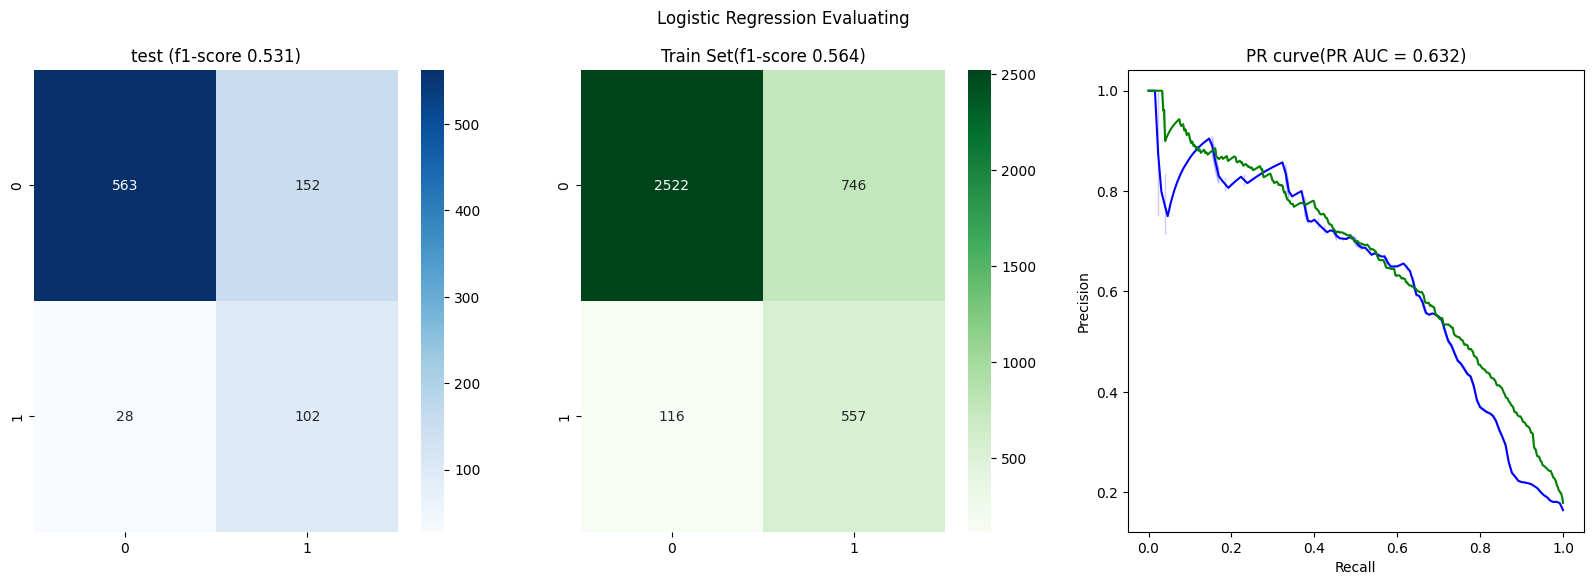

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_recall_curve, f1_score, recall_score, roc_auc_score, average_precision_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import seaborn.objects as so
from IPython.display import Image

collect_results = []

def model_evaluation(pipeline, X_test, y_test, X_train, y_train, model, probability=True, test=False):

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy on test set: {accuracy * 100:0.5}%")
    print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_pred)* 100:0.5}%")

    report = classification_report(y_test, y_test_pred,output_dict=True)
    print(classification_report(y_test, y_test_pred))
    f1_test = report['1']['f1-score']
    recall_test_val = report['1']['recall']

    print('______________________________________________')
    fig, ax =plt.subplots(1, 3, figsize=(20, 6))

    cm_lr_test = confusion_matrix(y_test, y_test_pred)
    ax[0].set_title(f'test (f1-score {f1_test:.3f})')
    sns.heatmap(cm_lr_test, annot = True,fmt = 'd', cmap ='Blues', ax=ax[0])

    f1_train = f1_score(y_train, y_train_pred)
    cm_lr = confusion_matrix(y_train, y_train_pred)
    ax[1].set_title(f'Train Set(f1-score {f1_train:.3f})')
    sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='Greens', ax=ax[1])

    if probability:
        y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]
        y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_train_pred_proba = pipeline.predict(X_train)
        y_test_pred_proba = pipeline.predict(X_test)
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_proba)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_proba)

    # Calculate the PR AUC
    pr_auc = average_precision_score(y_test, y_test_pred_proba)
    print(f"PR AUC: {pr_auc:.4f}")

    # ROC AUC (for comparison)
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    print(f"ROC AUC: {roc_auc:.4f}")

    # Precision-Recall curve
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_proba)
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_proba)
    ax[2].set_title(f'PR curve(PR AUC = {pr_auc:.3f})')
    sns.lineplot(x=recall_test, y=precision_test, color = 'blue',  ax=ax[2])
    sns.lineplot(x=recall_train, y=precision_train, color = 'green',  ax=ax[2])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    fig.suptitle(f'{model} Evaluating')
    plt.show()

    return {
    'Accuracy Score': accuracy,
    'F1-score': f1_test,
    'Recall': recall_test_val,
    'PR AUC': pr_auc,
    'Model': model
    }

model = 'Logistic Regression'
collect_results.append(model_evaluation(pipeline, X_val, y_val,  X_train, y_train, model='Logistic Regression'))

In [33]:
def prepare_2(X, model):
    num_columns = X.select_dtypes(["int64", "float64"]).columns
    pipline_num = Pipeline(steps=[('imputer', SimpleImputer(strategy="median")), ('scaler', StandardScaler())])

    cat_columns = X.select_dtypes("object").columns
    pipline_cat = Pipeline(steps=[('encoding', OneHotEncoder())])

    transformer = ColumnTransformer(
        transformers=[('categorical_col', pipline_cat, cat_columns),
                      ('numerical_col', pipline_num, num_columns)]
        )

    pipeline = Pipeline([
              ('transformer', transformer),
              ('undersampler', undersampler),
              ('classifier', model)
          ])

    return pipeline

### 4.8 Feature Engineering

In [34]:
def add_features_to_set(df):
    df_new_features = df.copy()
    df_new_features['avg_hour_spend_on_app_per_order'] = df['HourSpendOnApp'] / df['OrderCount']
    df_new_features['cashback_amount_per_month'] = df['CashbackAmount']/ (df['Tenure'] + 1)
    df_new_features['DaySinceLastOrder_2'] = df['DaySinceLastOrder'] * df['DaySinceLastOrder']

    return df_new_features

X_train_2 = add_features_to_set(X_train)
X_val_2 = add_features_to_set(X_val)
X_test_2 = add_features_to_set(X_test)

Accuracy on test set: 82.13%
Accuracy on Train Set: 81.35%
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       715
           1       0.45      0.75      0.56       130

    accuracy                           0.82       845
   macro avg       0.70      0.79      0.73       845
weighted avg       0.87      0.82      0.84       845

______________________________________________
PR AUC: 0.6447
ROC AUC: 0.8606


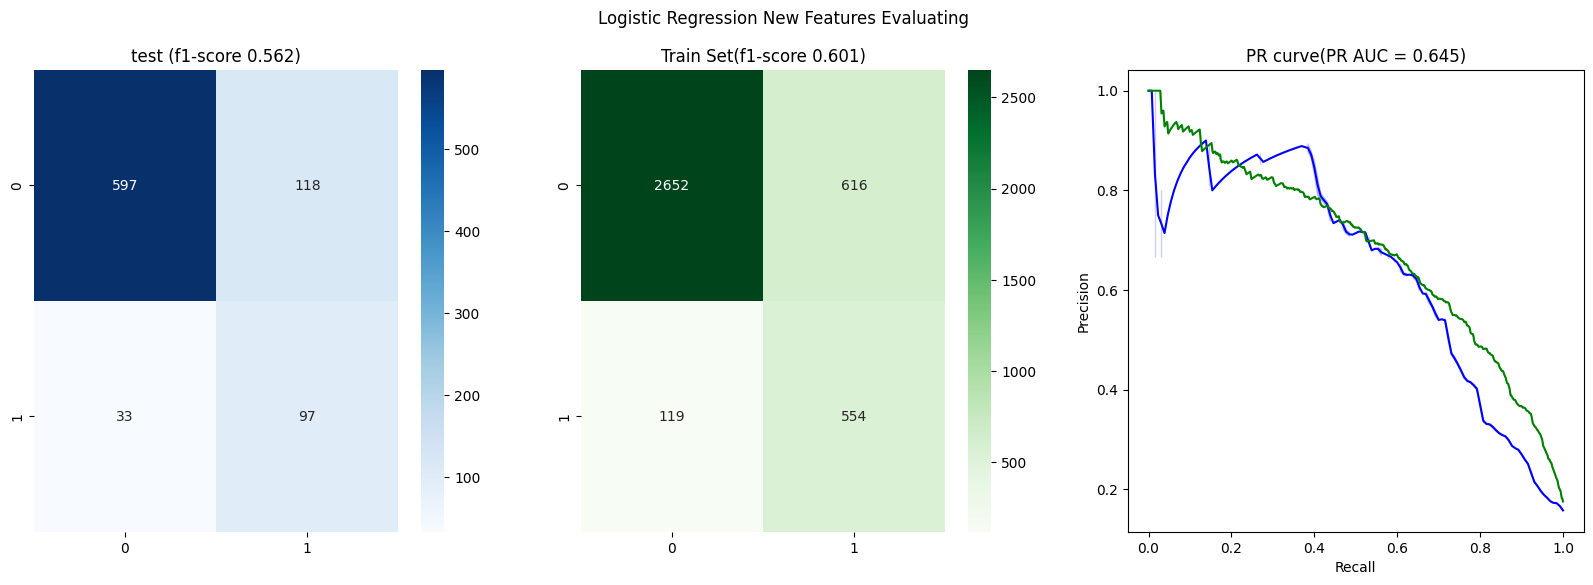

In [35]:
pipeline_2 = prepare_2(X_train_2, lg_model)
pipeline_2.fit(X_train_2, y_train)

model = 'Logistic Regression New Features'
collect_results.append(model_evaluation(pipeline_2, X_val_2, y_val,  X_train_2, y_train, model=model))

### 4.9 Implements RandomizedSearchCV for hyperparameter tuning with previous pipeline




In [36]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
import numpy as np

solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = np.logspace(-3,3,7)

grid = dict(
    classifier__solver=solvers,
    classifier__C=c_values,
    classifier__class_weight=[class_weight],
    classifier__max_iter=[10_000],
    classifier__random_state=[42]
    )
pipeline2 = prepare_2(X_train, lg_model)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
grid_search = RandomizedSearchCV(estimator=pipeline2, param_distributions=grid, cv=cv, scoring='f1')

grid_result = grid_search.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.559177 using {'classifier__solver': 'newton-cg', 'classifier__random_state': 42, 'classifier__max_iter': 10000, 'classifier__class_weight': {0: 0.60296817625459, 1: 2.927934621099554}, 'classifier__C': 100.0}


Accuracy on test set: 81.893%
Accuracy on Train Set: 81.248%
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       715
           1       0.45      0.75      0.56       130

    accuracy                           0.82       845
   macro avg       0.70      0.79      0.72       845
weighted avg       0.87      0.82      0.84       845

______________________________________________
PR AUC: 0.6427
ROC AUC: 0.8609


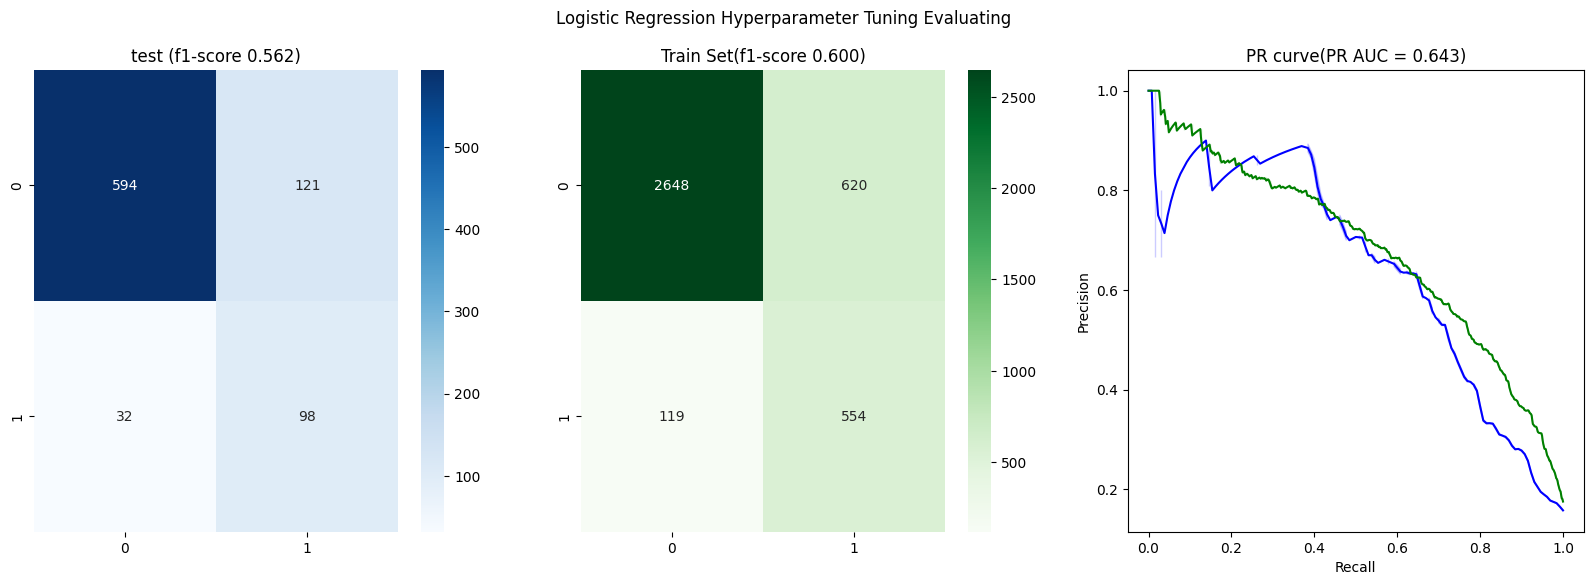

In [37]:
lg_model_2 = LogisticRegression(
    max_iter=10_000, random_state=42,
    C=grid_result.best_params_["classifier__C"],
    solver=grid_result.best_params_["classifier__solver"],
    class_weight=class_weight
    )

pipeline_3 = prepare_2(X_train_2, lg_model_2)

pipeline_3.fit(X_train_2,y_train)

model = 'Logistic Regression Hyperparameter Tuning'
collect_results.append(model_evaluation(pipeline_3, X_val_2, y_val,  X_train_2, y_train, model=model))

### 4.10 Support Vector Machines

In [38]:
from sklearn.svm import SVC

grid_svc = {
    "classifier__C":np.arange(1,7,1),
    'classifier__gamma':[0.01,0.05,0.1,0.5,1,5,7,10]
    }
svm = SVC(random_state=42)
pipeline_10 = prepare_2(X_train_2, svm)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search_svm = RandomizedSearchCV(estimator=pipeline_10, param_distributions=grid_svc, cv=cv, scoring='f1')
grid_result_svm = grid_search_svm.fit(X_train_2, y_train)

print("Best: %f using %s" % (grid_result_svm.best_score_, grid_result_svm.best_params_))

Best: 0.789143 using {'classifier__gamma': 0.05, 'classifier__C': 6}


Accuracy on test set: 94.083%
Accuracy on Train Set: 96.524%
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       715
           1       0.92      0.68      0.78       130

    accuracy                           0.94       845
   macro avg       0.93      0.83      0.87       845
weighted avg       0.94      0.94      0.94       845

______________________________________________
PR AUC: 0.6702
ROC AUC: 0.8329


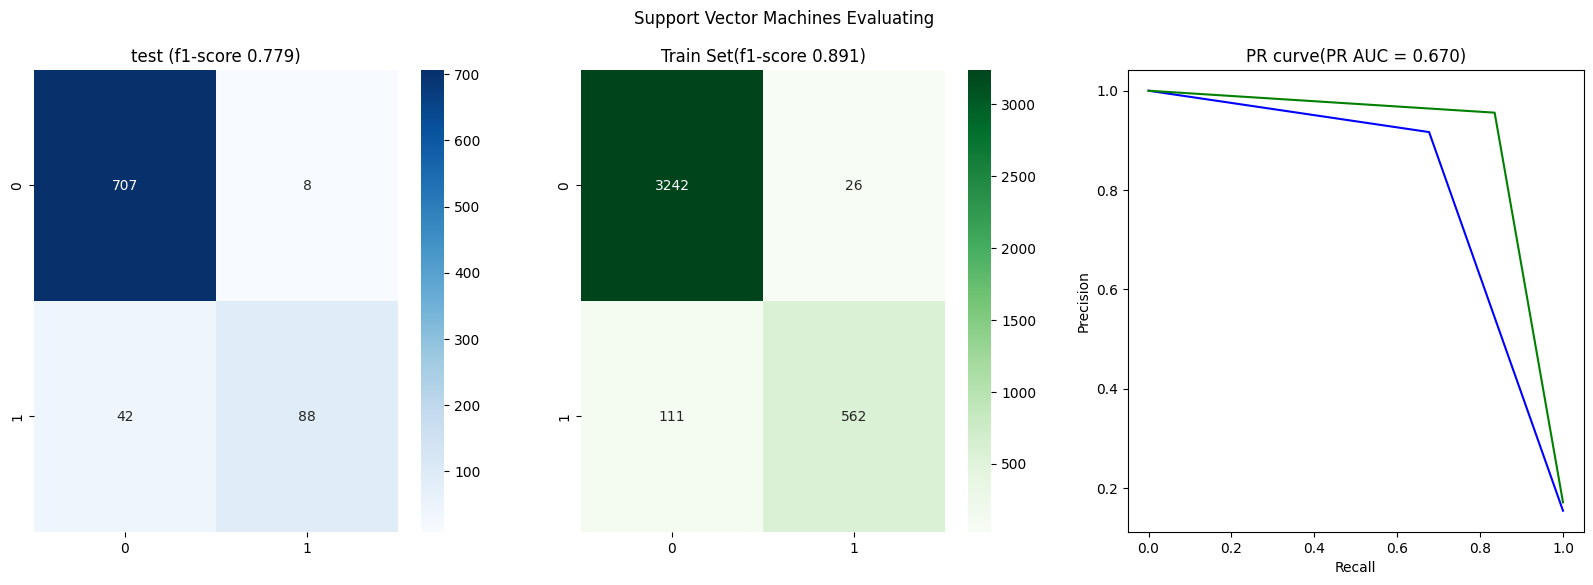

In [39]:
svm_2 = SVC(random_state=42,
    C = grid_result_svm.best_params_["classifier__C"],
    gamma = grid_result_svm.best_params_["classifier__gamma"]
    )

pipeline_11 = prepare_2(X_train_2, svm_2)
pipeline_11.fit(X_train_2,y_train)

model = 'Support Vector Machines'
collect_results.append(model_evaluation(pipeline_11, X_val_2, y_val, X_train_2, y_train, model=model, probability=False))

### 4.11 Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42,class_weight=class_weight)

pipeline_11 = prepare_2(X_train_2, decision_tree_model)
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 6, 8, 16, 32, 64, None]

grid_dt = dict(
    classifier__min_samples_split=min_samples_split_list,
    classifier__max_depth=max_depth_list,
    classifier__class_weight=[class_weight],
    classifier__random_state=[42]
    )
grid_search_dt = RandomizedSearchCV(estimator=pipeline_11, param_distributions=grid_dt, cv=cv, scoring='f1')
grid_result_dt = grid_search_dt.fit(X_train_2, y_train)

model = 'Decision Tree Classifier'
print("Best: %f using %s" % (grid_result_dt.best_score_, grid_result_dt.best_params_))

Best: 0.802032 using {'classifier__random_state': 42, 'classifier__min_samples_split': 2, 'classifier__max_depth': None, 'classifier__class_weight': {0: 0.60296817625459, 1: 2.927934621099554}}


Accuracy on test set: 94.201%
Accuracy on Train Set: 99.873%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       715
           1       0.81      0.82      0.81       130

    accuracy                           0.94       845
   macro avg       0.89      0.89      0.89       845
weighted avg       0.94      0.94      0.94       845

______________________________________________
PR AUC: 0.6882
ROC AUC: 0.8902


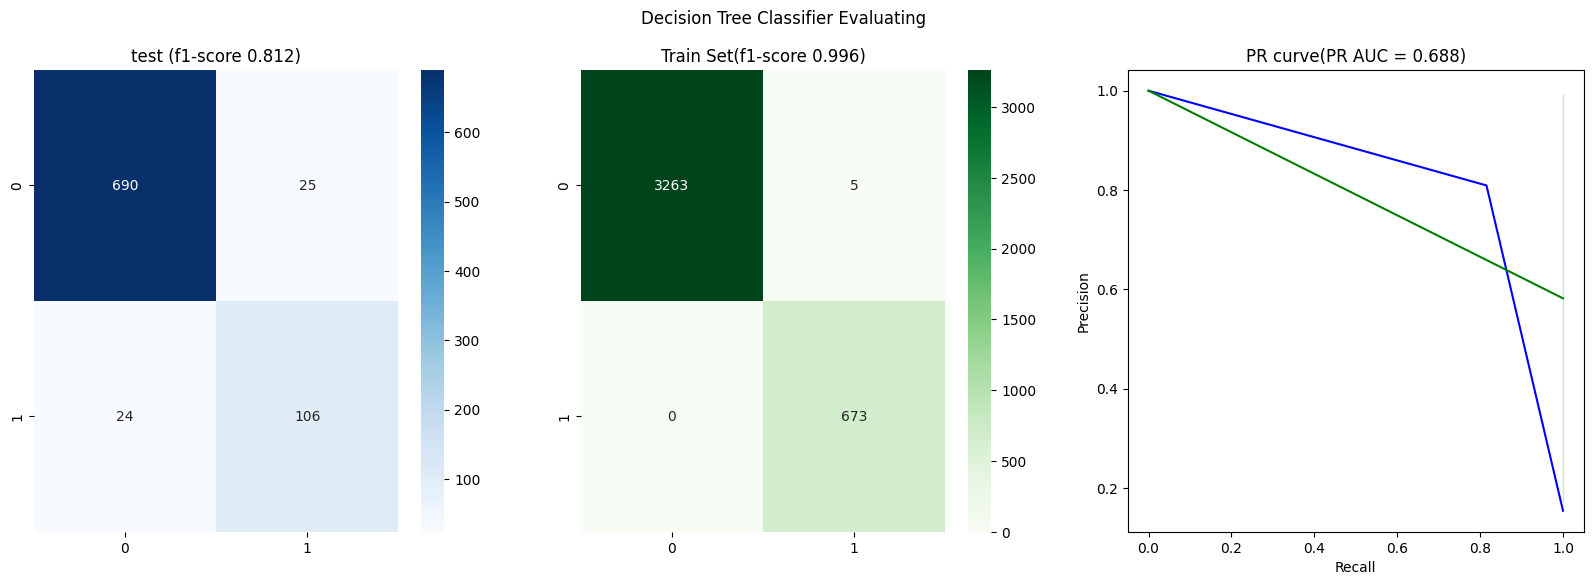

In [41]:
decision_tree_model_2 = DecisionTreeClassifier(
    random_state=42,
    class_weight=class_weight,
    max_depth = grid_result_dt.best_params_["classifier__max_depth"],
    min_samples_split = grid_result_dt.best_params_["classifier__min_samples_split"]
    )

pipeline_11 = prepare_2(X_train_2, decision_tree_model_2)

pipeline_11.fit(X_train_2,y_train)

collect_results.append(model_evaluation(pipeline_11, X_val_2, y_val,  X_train_2, y_train, model=model))

### 4.12 XGBoost

In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=42
    )

pipeline_12 = prepare_2(X_train_2, xgb)

grid_xgb = dict(
    classifier__n_estimators=np.arange(10,100,10),
    classifier__learning_rate=[0.001,0.005,0.01,0.05,0.1,0.5,1,5]
    )

grid_search_xgb = RandomizedSearchCV(estimator=pipeline_12, param_distributions=grid_xgb, cv=cv, scoring='f1')
grid_result_xgb = grid_search_xgb.fit(X_train_2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))

Best: 0.857450 using {'classifier__n_estimators': 80, 'classifier__learning_rate': 1}


Accuracy on test set: 96.923%
Accuracy on Train Set: 99.873%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       715
           1       0.93      0.86      0.90       130

    accuracy                           0.97       845
   macro avg       0.95      0.93      0.94       845
weighted avg       0.97      0.97      0.97       845

______________________________________________
PR AUC: 0.9270
ROC AUC: 0.9678


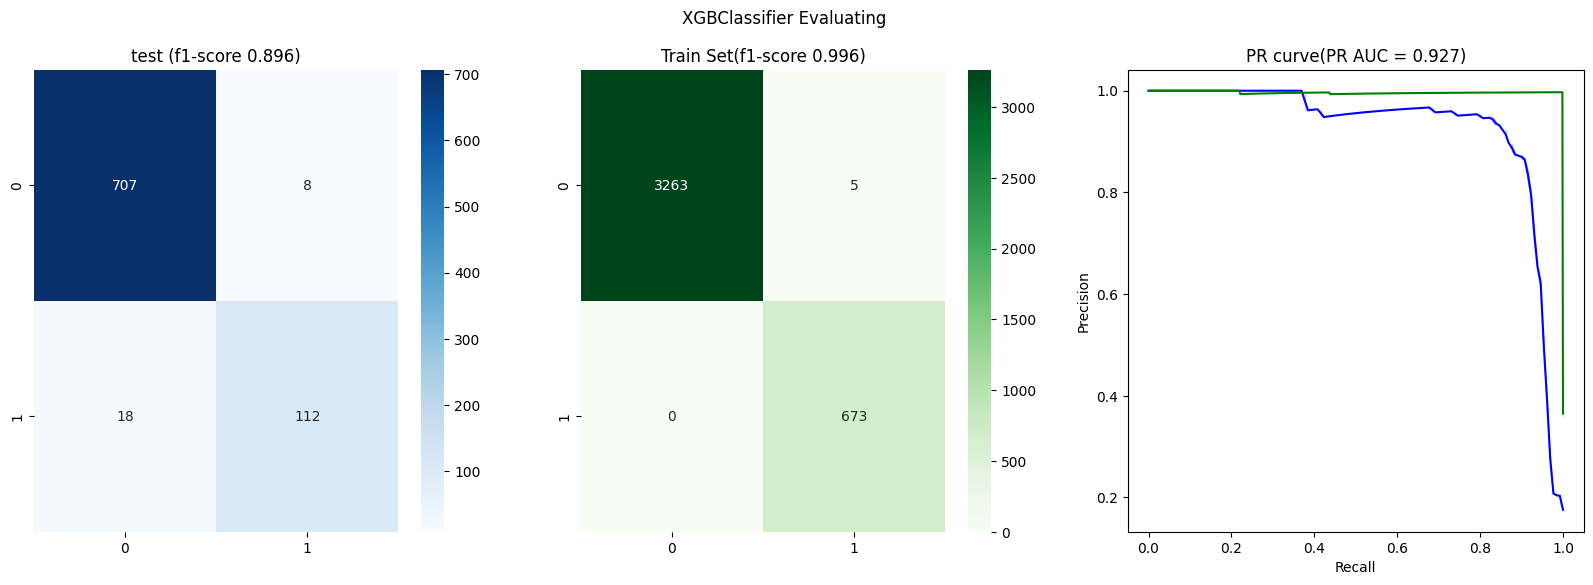

In [43]:
xgb_2 = XGBClassifier(
    random_state=42,
    learning_rate = grid_result_xgb.best_params_["classifier__learning_rate"],
    n_estimators = grid_result_xgb.best_params_["classifier__n_estimators"]
    )

pipeline_12 = prepare_2(X_train_2, xgb_2)

pipeline_12.fit(X_train_2,y_train)
model = 'XGBClassifier'

collect_results.append(model_evaluation(pipeline_12, X_val_2, y_val,  X_train_2, y_train, model=model))

### 4.13 Best Result

In [44]:
results = pd.DataFrame(collect_results)
results['Accuracy Score'] = pd.to_numeric(results['Accuracy Score'])
results['F1-score'] = pd.to_numeric(results['F1-score'])
results['Recall'] = pd.to_numeric(results['Recall'])
results['PR AUC'] = pd.to_numeric(results['PR AUC'])

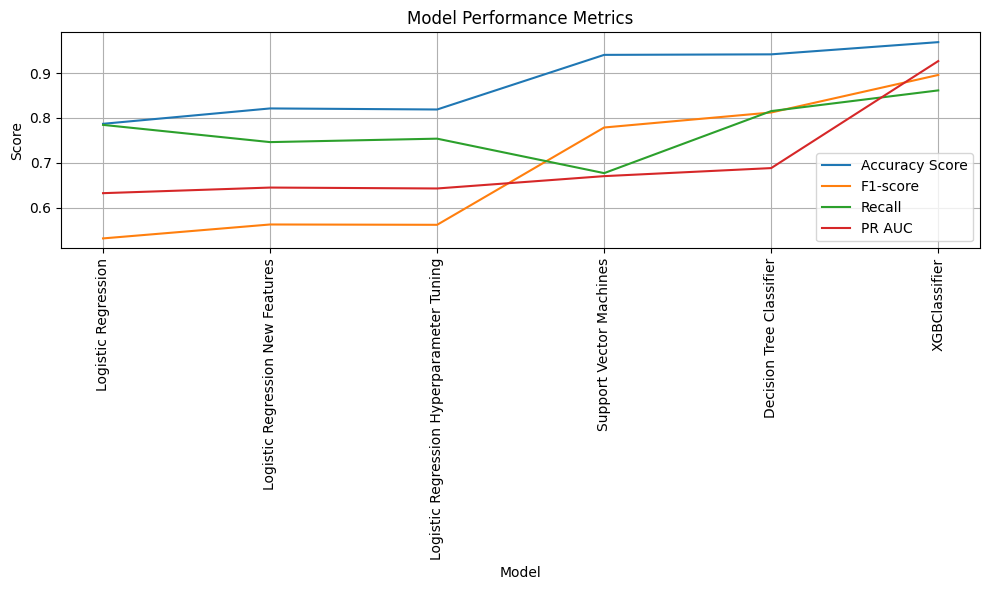

In [45]:
results.set_index('Model', inplace=True)
plt.figure(figsize=(10, 6))

for column in results.columns:
    plt.plot(results.index, results[column], label=column)
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

==>  XGBClassifier có kết quả cao nhất nên best model thuộc về  XGBClassifier

Accuracy on test set: 95.616%
Accuracy on Train Set: 99.873%
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       699
           1       0.89      0.86      0.87       145

    accuracy                           0.96       844
   macro avg       0.93      0.92      0.92       844
weighted avg       0.96      0.96      0.96       844

______________________________________________
PR AUC: 0.9154
ROC AUC: 0.9697


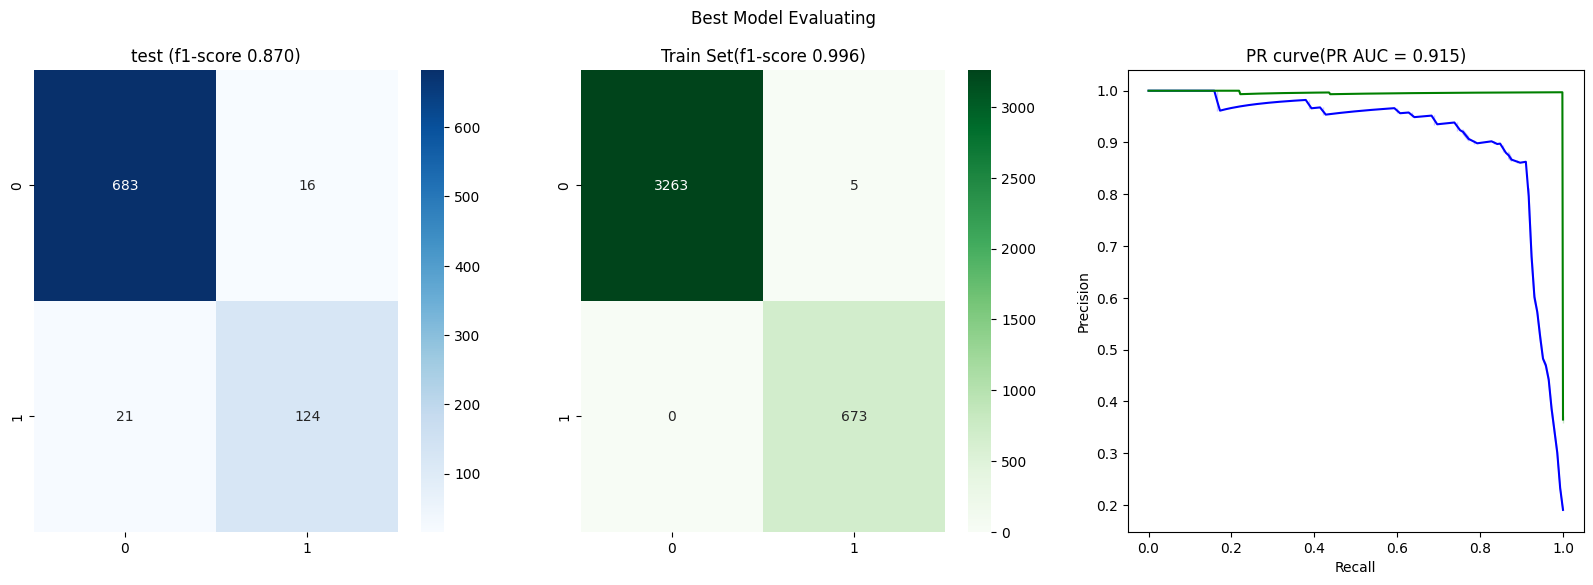

{'Accuracy Score': 0.9561611374407583,
 'F1-score': 0.8701754385964913,
 'Recall': 0.8551724137931035,
 'PR AUC': 0.9154231004155933,
 'Model': 'Best Model'}

In [46]:
model_evaluation(pipeline_12, X_test_2, y_test,  X_train_2, y_train, model='Best Model', test=True)

In [59]:
results.to_csv('/content/drive/MyDrive/DA/results.csv')

### 4.14 Save model!

In [47]:
import joblib
joblib.dump(pipeline_12, '/content/drive/MyDrive/DA/pipeline12.joblib')
loaded_pipeline = joblib.load('/content/drive/MyDrive/DA/pipeline12.joblib')

In [48]:
y_test_pd = loaded_pipeline.predict(X_test_2)
y_test_pd

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [57]:
X_test_2.to_csv("/content/drive/MyDrive/DA/X_test_2.csv", index = False)
y_test.to_csv("/content/drive/MyDrive/DA/y_test.csv", index = False)
pd.DataFrame(y_test_pd, columns = ['Churn']).to_csv("/content/drive/MyDrive/DA/y_test_predict.csv", index = False)

In [58]:
results

,Accuracy Score,F1-score,Recall,PR AUC
Model,,,,
Logistic Regression,0.786982,0.531250,0.784615,0.632211
Logistic Regression New Features,0.821302,0.562319,0.746154,0.644722
Logistic Regression Hyperparameter Tuning,0.818935,0.561605,0.753846,0.642676
Support Vector Machines,0.940828,0.778761,0.676923,0.670217
Decision Tree Classifier,0.942012,0.812261,0.815385,0.688179
XGBClassifier,0.969231,0.896000,0.861538,0.926970
